# Clustering 

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

Expecting a plot of `epsilon` vs `sil_score`.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN

In [3]:
X = pd.read_csv('data/3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon','alt'])
X = X.drop(['osm'], axis=1).sample(10000)
X.head()

,lat,lon,alt
381299,8.697499,56.960387,28.030476
26533,10.295159,57.448328,80.049196
338384,9.863616,56.856573,36.967641
18231,8.404013,56.710705,38.030832
73387,9.939837,57.043799,2.781029


In [4]:
from sklearn.metrics import silhouette_score
all_scores = []
for min_sample in range(1, 11):
    scores = []
    for epsilon in np.arange(0.05, 0.51, 0.01):
        
        dbscan = DBSCAN(eps=epsilon, min_samples=min_sample)
        cluster = dbscan.fit_predict(X[['lat','lon', 'alt']])

        # calculate silouette score here
        score = silhouette_score(X[['lat','lon', 'alt']], cluster)
        
        scores.append(score)
        
    all_scores.append(scores)

In [5]:
all_scores

[[0.14167556171737952,
  0.15443633536017393,
  -0.08357335422511171,
  -0.5267896323589104,
  -0.7670910550898974,
  -0.818814892195846,
  -0.7271052596828594,
  -0.6577408960680218,
  -0.6339131158133907,
  -0.5795370729286866],
 [-0.5431270304730578,
  -0.1470111133011138,
  -0.1380767322390031,
  -0.5137128516938345,
  -0.7552062678788203,
  -0.7261236530625375,
  -0.5958381958586478,
  -0.6378910200493381,
  -0.6282012487493992,
  -0.5794750866981738],
 [-0.7519154272442823,
  -0.38537600561470015,
  -0.2207678741783689,
  -0.5195176833062682,
  -0.7210155148792909,
  -0.7119244182131933,
  -0.5973724253641395,
  -0.6113901252497976,
  -0.5907237377325854,
  -0.5406488277282301],
 [-0.7729054714764483,
  -0.5614706907270581,
  -0.3076101591565368,
  -0.47763010656910027,
  -0.7185213850852973,
  -0.6275993231272161,
  -0.60208985518152,
  -0.6153897106186198,
  -0.5923887792108483,
  -0.5410585064913552],
 [-0.7004050783414434,
  -0.6564659755837862,
  -0.4101199780046713,
  -0.41

C:\Users\Lite\AppData\Local\Temp\ipykernel_52048\3981562889.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)


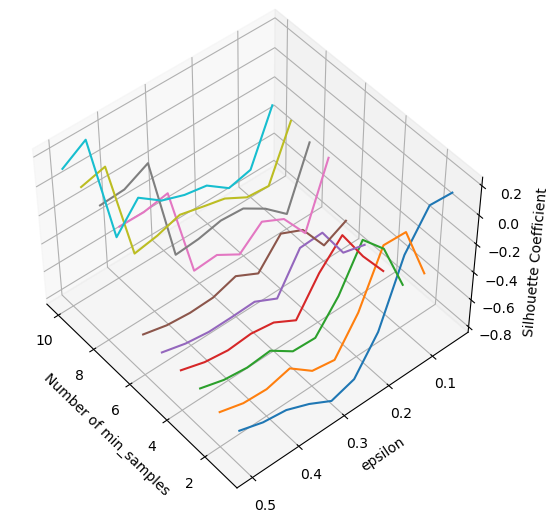

In [6]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()
for min_sample in range(1, 11):
    ax.plot([min_sample] * len(all_scores[0]), np.arange(0.05, 0.51, 0.01), all_scores[min_sample-1])

ax.set_xlabel('Number of min_samples')
ax.set_ylabel('epsilon')
ax.set_zlabel('Silhouette Coefficient')
plt.show()

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data (repeat the above). If your data is labeled with a class that you are attempting to predict, be sure to not use it in training and clustering. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D or 3D plots. 

As a bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot (like in 1.)
- Plots of the clustered data

In [34]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

data = pd.read_csv("data\\iris.data", names=["SepalLength", "Sepal width","Petal length","Petal width","Class"], index_col=False)

new_data = data.copy()

new_data['Class'] = enc.fit_transform(data[['Class']])
labels = new_data.iloc[:, -1].to_numpy()
X = new_data.iloc[:, :-1].to_numpy()
print(X[:5])
print(labels[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0. 0. 0. 0. 0.]


In [37]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
print(X.shape)
X

(150, 3)


array([[-2.68420713,  0.32660731, -0.02151184],
       [-2.71539062, -0.16955685, -0.20352143],
       [-2.88981954, -0.13734561,  0.02470924],
       [-2.7464372 , -0.31112432,  0.03767198],
       [-2.72859298,  0.33392456,  0.0962297 ],
       [-2.27989736,  0.74778271,  0.17432562],
       [-2.82089068, -0.08210451,  0.26425109],
       [-2.62648199,  0.17040535, -0.01580151],
       [-2.88795857, -0.57079803,  0.02733541],
       [-2.67384469, -0.1066917 , -0.1915333 ],
       [-2.50652679,  0.65193501, -0.069275  ],
       [-2.61314272,  0.02152063,  0.10765035],
       [-2.78743398, -0.22774019, -0.20032779],
       [-3.22520045, -0.50327991,  0.06841363],
       [-2.64354322,  1.1861949 , -0.1445057 ],
       [-2.38386932,  1.34475434,  0.28373066],
       [-2.6225262 ,  0.81808967,  0.14531599],
       [-2.64832273,  0.31913667,  0.03339425],
       [-2.19907796,  0.87924409, -0.11452146],
       [-2.58734619,  0.52047364,  0.21957209],
       [-2.3105317 ,  0.39786782, -0.233

In [57]:
from sklearn.metrics import v_measure_score

all_scores = []
all_clusters = []
for min_sample in range(1, 11):
    scores = []
    clusters = []
    for epsilon in np.arange(0.05, 0.51, 0.05):
        
        dbscan = DBSCAN(eps=epsilon, min_samples=min_sample)
        cluster = dbscan.fit_predict(X)
        clusters.append(cluster)

        # calculate silouette score here
        score = v_measure_score(labels, cluster)
        
        scores.append(score)
        
    all_scores.append(scores)
    all_clusters.append(clusters)

all_scores

[[0.3615025522111045,
  0.36925353066227723,
  0.39493263106083876,
  0.42770845923582096,
  0.48777765586775623,
  0.5564179633793501,
  0.5659825855518522,
  0.5993539628084387,
  0.6427550164649745,
  0.6599508222832073],
 [0.05830415764818812,
  0.20495319967612752,
  0.3221856002433511,
  0.39131479397508223,
  0.46360374298122314,
  0.5386456621648364,
  0.5515573926263604,
  0.5871757823399452,
  0.6257793784771467,
  0.6571788607036102],
 [0.03740984619206994,
  0.09188335656811052,
  0.26706857973771697,
  0.38345611614709163,
  0.4620476637872152,
  0.5442953169081833,
  0.5524056388279177,
  0.5802059398068086,
  0.627585329642541,
  0.6625376669466911],
 [0.0,
  0.060708642450685156,
  0.19304007797420558,
  0.3210854864936306,
  0.44410060067451906,
  0.5194934837499603,
  0.5553331480460819,
  0.575816911358352,
  0.6220887542320666,
  0.6587633493101253],
 [0.0,
  0.060708642450685156,
  0.17265776246056863,
  0.25366546045140775,
  0.41803347743449043,
  0.5147455530776

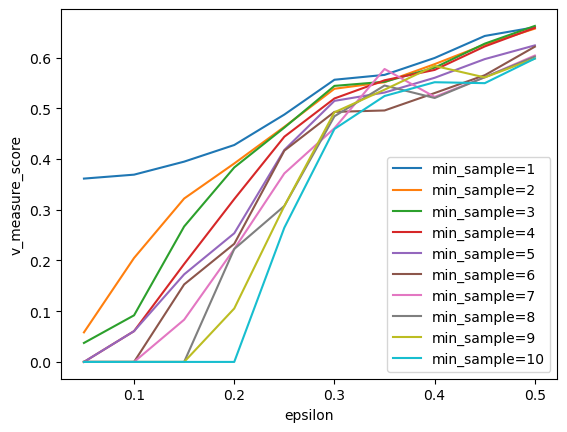

In [53]:
fig = plt.figure(3)
plt.clf()

plt.cla()
for min_sample in range(len(all_scores)):
    # ax.plot([min_sample] * len(all_scores[0]), np.arange(0.05, 0.51, 0.01), all_scores[min_sample-1])
    plt.plot(np.arange(0.05, 0.51, 0.05), all_scores[min_sample], label=f"min_sample={min_sample+1}")

plt.legend()
plt.xlabel("epsilon")
plt.ylabel("v_measure_score")
plt.show()

In [64]:
np.array(all_clusters).shape

(10, 10, 150)

In [76]:
def plot_clustered(cluster, X):
    fig = plt.figure(3)
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)
    plt.cla()
    
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=cluster)
    plt.show()

C:\Users\Lite\AppData\Local\Temp\ipykernel_36076\3122014412.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)


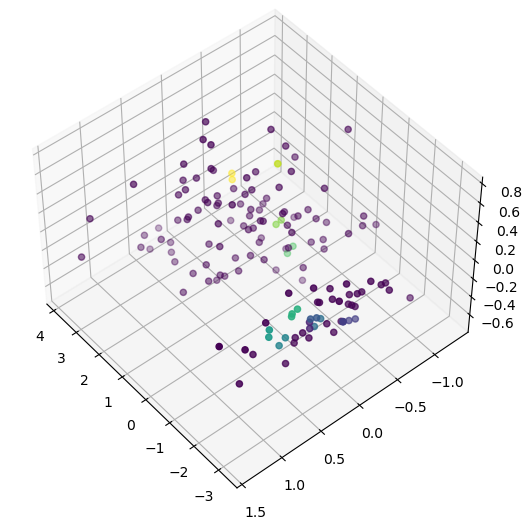

In [77]:
min_sample_idx = 1  # idx of min_sample in all_clusters[0,9]
epsilon_idx = 1  # idx of epsilon in all_clusters[0,9]
cluster = all_clusters[min_sample_idx][epsilon_idx]
plot_clustered(cluster, X)

C:\Users\Lite\AppData\Local\Temp\ipykernel_36076\3122014412.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)


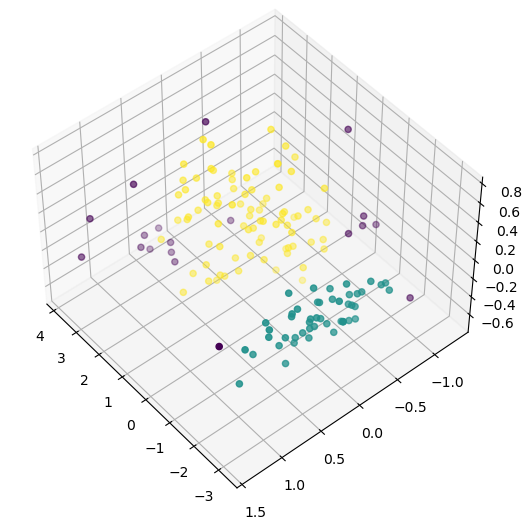

In [78]:
min_sample_idx = 9  # idx of min_sample in all_clusters[0,9]
epsilon_idx = 9  # idx of epsilon in all_clusters[0,9]
cluster = all_clusters[min_sample_idx][epsilon_idx]
plot_clustered(cluster, X)